# Data Modeling

## 1. Library import 

In [ ]:



# Import python librairies 
from pathlib import Path
import sys
import pandas as pd 

# Root of the project 
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

# Import the paths 
from src.utils.config import (
    METRICS_DIR,
    MODELS_DIR,
    MODELS_LINEAR_DIR
)

# Import functions to manipulate data (import, save...)
from src.data_loading.sampled_shuffled_data import sampled_shuffled_data
from src.utils.io import save_dataframe_as_csv, download_model
from src.plot.plot_target_variable import plot_target_variable

# Import the functions to train models 
from src.models.split_train_test import split_TrainTest
from src.models.linear_models import lin_reg, lin_reg_lasso, lin_reg_ridge
from src.models.random_forest import random_forest, train_best_random_forest 
from src.models.neural_network import random_search_nn, KerasRegressorWrapper


## 2. Data import 

In [2]:

# # Load data 
# df_all = pd.read_csv(RESULTS_DIR / "dataframes" / "data_magnus_moves.csv")
# print(df_all)

# # Function to save the dataset shuffled and a sample (for the website) results 
# sampled_shuffled_data(df_all, RESULTS_DIR / "dataframes")



I already created the dataset we will use by randomly shuffle it using the code above. I downloaded it to not have a different csv each time I run the code and not have differents results. 

In [3]:
# Import data 

df = pd.read_csv(METRICS_DIR / "data_shuffled_magnus.csv")
df_sample = pd.read_csv(METRICS_DIR / "data_sample_magnus.csv")
print("DATA WE WILL USE TO CONSTRUCT OUR MODEL")
display(df.head())
print("DATA WE WILL USE TO SHOW OUR RESULTS ON WEBSITE")
display(df_sample.head()) 

DATA WE WILL USE TO CONSTRUCT OUR MODEL


,ID_game,ID_move,PlayerName,PlayerSide,PlayerElo,PlayerTitle,MagnusElo,OpponentElo,OpponentTitle,OpponentName,...,FEN_after,OpponentTimeSpend,TimeSpend,time_spend_before,TimeRatio,TimePressure,MoveTimeFraction,IsCastling,IsPromotion,IsEnPassant
0,1855,46,"Carlsen, Magnus",0,2881.0,4,2881,2787.0,4,"Bortnyk, Olexandr",...,1r4k1/r3qp1p/pp1bp1p1/2p1p2P/P1B1Q3/2PP2P1/RP3...,5.0,3.0,2.0,1.903846,0,0.030000,0,0,0
1,2425,22,"Carlsen, Magnus",0,3342.0,4,3342,3055.0,4,"Tabatabaei, M. Amin",...,r2qk2r/ppp2pp1/3p1n1p/4p3/2PbP3/3P2P1/PP3PBP/R...,4.0,2.0,3.0,1.140845,0,0.012270,0,0,0
2,2137,45,"Carlsen, Magnus",1,2888.0,4,2888,1904.0,0,"Primbetov, Nurassyl",...,r1br4/p2nqpk1/3Np1pp/2p1P3/1P1p1Q2/3P1N1P/P4PP...,16.0,1.0,15.0,2.238095,0,0.020833,0,0,0
3,307,45,"Carlsen, Magnus",1,3258.0,4,3258,3047.0,4,"Bok, Benjamin",...,5rk1/1q3ppp/8/1p1p4/2pPn3/2P1P3/1PQ1B1PP/R5K1 ...,26.0,1.0,4.0,0.893204,0,0.010753,0,0,0
4,582,145,"Carlsen, Magnus",1,3305.0,4,3305,3195.0,4,"Maghsoodloo, Parham",...,7R/5kp1/5p2/5P2/r6P/4BKb1/8/8 b - - 3 73,1.0,1.0,1.0,1.200000,1,0.142857,0,0,0


DATA WE WILL USE TO SHOW OUR RESULTS ON WEBSITE


,ID_game,ID_move,PlayerName,PlayerSide,PlayerElo,PlayerTitle,MagnusElo,OpponentElo,OpponentTitle,OpponentName,...,FEN_after,OpponentTimeSpend,TimeSpend,time_spend_before,TimeRatio,TimePressure,MoveTimeFraction,IsCastling,IsPromotion,IsEnPassant
0,2291,1,"Carlsen, Magnus",1,3298.0,4,3298,2683.0,2,"Dowgird, Filip",...,rnbqkbnr/pppppppp/8/8/8/1P6/P1PPPPPP/RNBQKBNR ...,0.0,1.0,0.0,0.994475,0,0.005525,0,0,0
1,2291,2,"Dowgird, Filip",0,2683.0,2,3298,2683.0,2,"Dowgird, Filip",...,rnbqkbnr/ppp1pppp/8/3p4/8/1P6/P1PPPPPP/RNBQKBN...,1.0,3.0,0.0,0.994475,0,0.016575,0,0,0
2,2291,3,"Carlsen, Magnus",1,3298.0,4,3298,2683.0,2,"Dowgird, Filip",...,rnbqkbnr/ppp1pppp/8/3p4/8/1P6/PBPPPPPP/RN1QKBN...,3.0,2.0,1.0,1.005587,0,0.011050,0,0,0
3,2291,4,"Dowgird, Filip",0,2683.0,2,3298,2683.0,2,"Dowgird, Filip",...,rnbqkb1r/ppp1pppp/5n2/3p4/8/1P6/PBPPPPPP/RN1QK...,2.0,1.0,3.0,0.988889,0,0.005587,0,0,0
4,2291,5,"Carlsen, Magnus",1,3298.0,4,3298,2683.0,2,"Dowgird, Filip",...,rnbqkb1r/ppp1pppp/5n2/3p4/8/1P3N2/PBPPPPPP/RN1...,1.0,2.0,2.0,1.000000,0,0.011111,0,0,0


## 3. Data description

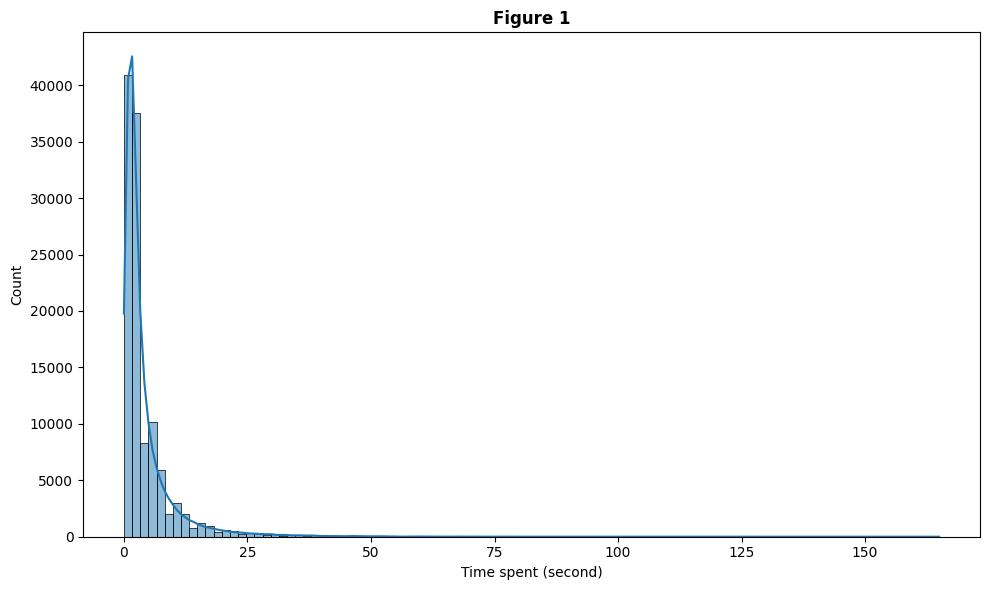

Image saved in results/figures


In [ ]:
plot_target_variable(df, "TimeSpent", "Time spent", "second")

## 4. Pre-modeling and Split Train/Test

In [ ]:
# Target variable 
target = "TimeSpent"

# list_features 
list_features = ['ID_move', 
                 'PlayerSide', 
                 'PlayerTimeLeft', 
                 'OpponentTimeLeft', 
                 'Phase', 'Increment', 
                 'IsCapture', 
                 'IsCheck', 
                 'OppIsCaptured', 
                 'OppIsCheck', 
                 'NumLegalMoves', 
                 'OpponentTimeSpend', 
                 "TimeTotal", 
                 "Phase",
                 "TimeRatio",
                 "TimePressure",
                 "IsCastling",
                 "IsPromotion",
                 "IsEnPassant"] 

# Train test/split 
X_train, X_test, y_train, y_test = split_TrainTest(df, target, list_features)

## 5. Linear models 

### 5.1 Train model 

In [6]:
print("\n---Linear regression---\n")
# functions to create the model and show results 
reg = lin_reg(X_train, X_test, y_test, y_train)

print("\n\n---Linear regression ridge---\n")
lasso = lin_reg_lasso(X_train, X_test, y_test, y_train)
print("\n\n---Linear regression lasso---\n")
ridge = lin_reg_ridge(X_train, X_test, y_test, y_train)


---Linear regression---

MSE: 35.920798734743904
RMSE:  5.9933962604473185
R²: 0.08365933552946625


---Linear regression ridge---

MSE: 35.92800997362834
RMSE:  5.993997828964266
R²: 0.08347537660695403


---Linear regression lasso---

MSE: 35.92079619936979
RMSE:  5.9933960489333415
R²: 0.08365940020693685


### 5.2 Download models 

In [ ]:

# Functions to download our models 
download_model(
    lin_reg,
    MODELS_LINEAR_DIR,
    filename="lin_reg_time_spent.pkl"
)

download_model(
    ridge,
    MODELS_DIR / "linear_models",
    filename="ridge_time_spent.pkl"
)

download_model(
    lasso,
    MODELS_DIR / "linear_models",
    filename="lasso_time_spent.pkl"
)


✅ Model saved to C:\Users\elija\OneDrive\Bureau\Projet de recherche encadré\Projet sciences des données\magnus-time-prediction-ml\results\models\linear_models\lin_reg_time_spent.pkl
✅ Model saved to C:\Users\elija\OneDrive\Bureau\Projet de recherche encadré\Projet sciences des données\magnus-time-prediction-ml\results\models\linear_models\ridge_time_spent.pkl
✅ Model saved to C:\Users\elija\OneDrive\Bureau\Projet de recherche encadré\Projet sciences des données\magnus-time-prediction-ml\results\models\linear_models\lasso_time_spent.pkl


## 6. Random Forest 

### 6.1 Train model 

In [8]:
# Find the best models for our problem by using a grid 
grid = random_forest(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [9]:
# Train a model by using best parameters 
model_rf = train_best_random_forest(grid, X_train, y_train, X_test, y_test)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
MSE: 19.560038815020313
RMSE:  4.422673265686751
R²: 0.5010228169706947


So the best parameters we found for our problems need to use to train our models are {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}

### 6.2 Download results 

- Est-ce que je dois garder garder les plots pour l'évaluation 

- Donner la structure du projet pour savoir ce qu'il en pense

- représentation graphique 

In [10]:
# Download the model in Result folder 
download_model(
    model_rf,
    MODELS_DIR,
    filename="random_forest_time_spent.pkl"
)

✅ Model saved to C:\Users\elija\OneDrive\Bureau\Projet de recherche encadré\Projet sciences des données\magnus-time-prediction-ml\results\models\random_forest_time_spent.pkl


## 7. Two layers Neural Network 

### 7.1 Train model 

In [11]:
model_nn, results_nn = random_search_nn(X_train, y_train, X_test, y_test, n_iter=30)
results_nn.head()

584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
730/730 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
584/584 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
730/730 ━━━━━━━━━━━━━━

,iter,layer_sizes,n_layers,activation,dropout,l2,batch_size,epochs_trained,train_time_s,mse_val,rmse_val,mae_val,r2_val,mse_test,rmse_test,mae_test,r2_test
0,12,"(224,)",1,relu,0.0,0.0001,32,30,76.002764,35.861804,5.988473,3.232450,0.104463,34.875410,5.905541,3.219841,0.110327
1,25,"(154, 14)",2,tanh,0.0,0.0001,32,68,311.240532,35.897066,5.991416,3.246380,0.103582,34.949801,5.911836,3.238637,0.108430
2,7,"(255,)",1,relu,0.1,0.0000,64,53,111.902755,35.918347,5.993192,3.257893,0.103051,34.870522,5.905127,3.241955,0.110452
3,5,"(100,)",1,relu,0.0,0.0001,64,32,420.828703,35.926975,5.993912,3.208419,0.102835,34.929942,5.910156,3.195382,0.108936
4,18,"(331, 57, 83)",3,tanh,0.1,0.0000,128,90,122.841826,35.928780,5.994062,3.239478,0.102790,34.897856,5.907441,3.227764,0.109755


### 7.2 Download model 

In [12]:
download_model(
    model_nn,
    MODELS_DIR,
    filename="neural_network.pkl"
)

✅ Model saved to C:\Users\elija\OneDrive\Bureau\Projet de recherche encadré\Projet sciences des données\magnus-time-prediction-ml\results\models\neural_network.pkl


So the neural networks are less better than the random forest to predict our variable. We will keep the random forest model to show our prediction. 